<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [103]:
# código

#Función que retorna los datos de categoría 
def data_categoria(data_aspirantes, pos_categoria):
    categoria = []
    for i in data_aspirantes:
        categoria.append(i[pos_categoria])
    return categoria

#Función que retorna una lista de listas con cada una de las variables que se encuentran en la lista de archivos que se pasen por 
    #parámetro.Dada una de las listas internas correspone a la información de la misma persona
    #EG. L=[[persona_1, edad_persona_1, genero_persona_1], [persona_2, edad_persona_2, genero_persona_2]]
    
def archivos(lista_archivos_a_leer):   
    lista_archivos = []
    archivo =[]
    if(len(lista_archivos_a_leer) > 0):
        for i in range(len(lista_archivos_a_leer)):
            with open(lista_archivos_a_leer[i], encoding = "utf-8") as f:
                registros = f.readlines()
            for j in range(len(registros)):
                archivo.append(registros[j].replace("\n",""))
            lista_archivos.append(archivo)
            archivo = []
        lista_archivos = [[row[i] for row in lista_archivos] for i in range(len(lista_archivos[0]))]
        for i in range(len(lista_archivos)):
            lista_archivos[i].insert(0,i+1)
    else:
        print("La lista de archivos esta vacía")
    return lista_archivos


archivos_data_aspirantes = ["./Archivos/edad.txt", "./Archivos/escolaridad.txt", "./Archivos/estado_civil.txt",\
                            "./Archivos/estrato.txt", "./Archivos/genero.txt", "./Archivos/promedio.txt",\
                            "./Archivos/region.txt"]
data_aspirantes = archivos(archivos_data_aspirantes)

**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

Estadísticos Descriptivos variables Numéricas
Categoria, mediana, media, desviación estandar, cantidad, máximo, mínimo
['edad', (42.0, 48.748, 18.59485133040864, 500, 80.0, 18.0)]
['estrato', (2.0, 2.308, 0.9762868430947917, 500, 5.0, 1.0)]
['pomedio', (2.0, 2.6212000000000004, 1.1159169144698917, 500, 5.0, 0.0)]
Gráficos de barras Variables Categóricas


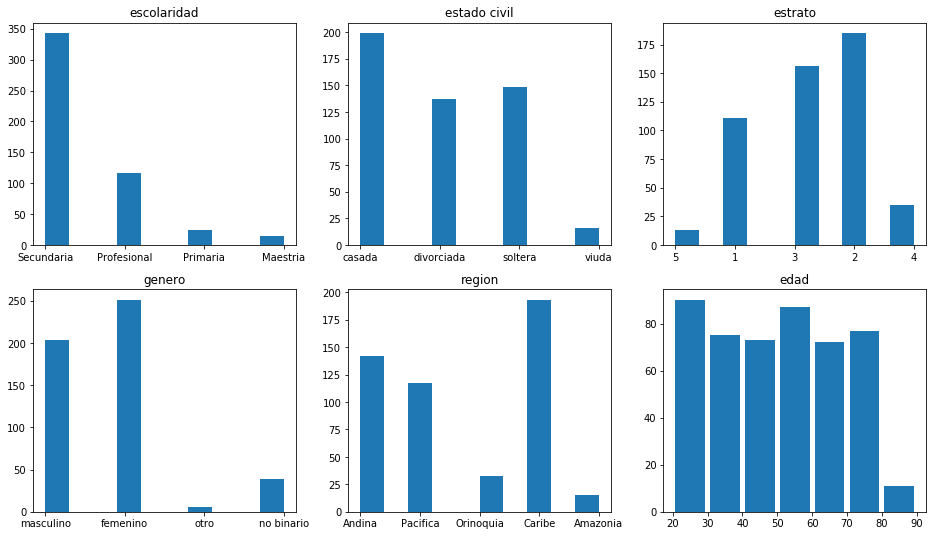

In [133]:
# código

# importación de paquetes necesarios

import matplotlib.pyplot as plt
import math as mt

# función que calcula la mediana de una lista de datos numéricos
def calculo_mediana (lista_datos):
    for i in range(len(lista_datos)):
        if len(lista_datos)%2 == 0:
            mediana = (int(lista_datos[int(len(lista_datos)/2 + 0.5)]) +\
                       int(lista_datos[int(len(lista_datos)/2 - 0.5)]))/2
        else:
            mediana = lista_datos[int(len(lista_datos)/2)]                    
    return mediana
                                   

# función que calcula la desviación de una lista de datos numéricos
def calculo_desviación (lista_datos):
    des = 0
    for i in lista_datos:
        des += (i-(sum(lista_datos)/len(lista_datos)))**2
    desv_est=(des/len(lista_datos))**(1/2)
    return desv_est

# función que calcula algunos estadisticos descriptivos lista de datos numéricos
def estaditicos_descriptivos(lista_datos):
    mean = sum(lista_datos)/len(lista_datos)
    median = calculo_mediana(lista_datos)
    sd =  calculo_desviación(lista_datos)
    n = len(lista_datos)
    estadisticos = (median,mean,sd,n, max(lista_datos), min(lista_datos))
    return(estadisticos)


'''
función que visualiza las características de una población dada
(nota que la variable 'poblacion' es local; podemos pasar cualquier población a la función)
'''
#Función que calcula estadísticos descriptivos e histogramas de una población. Recibe como parámetro una lista de listas que 
#representa la población ,un diccionario con las variables categóricas a graficar y un diccionario con las varaibles numéricas.
#Los dos diccionarios se deben generar de la siguiente manera {"nombre_variable, posicion_variable_en_lista_población",...}

def caracteristicas_poblacion(poblacion, dic_var_categoricas, dic_var_numericas): 
    numericas = []
    categoricas_key = list(dic_var_categoricas.keys())
    categoricas_value = dic_var_categoricas.values()
    numericas_key = dic_var_numericas.keys()
    numericas_value = dic_var_numericas.values()
    intervalos_edades = [20, 30, 40, 50, 60, 70, 80, 90]
    
    fig, ax = plt.subplots(2,3, sharey = False, figsize=(16,9))
    for i in range(len(categoricas_key)):
        a = data_categoria(poblacion,dic_var_categoricas.get(categoricas_key[i]))
        if i <= 2 and categoricas_key[i] != "edad": 
            ax[0,i].hist(a,  align = "mid")
            ax[0,i].set_title(categoricas_key[i])
            
        elif categoricas_key[i] == "edad" and i > 2:
            a = [int(x) for x in a]
            ax[1,i-3].hist(a, bins = intervalos_edades, rwidth=0.85)
            ax[1,i-3].set_title(categoricas_key[i])
            ax[1,i-3].set_xticks(intervalos_edades)
            
        elif categoricas_key[i] == "edad" and i <= 2:
            a = [int(x) for x in a]
            ax[0,i].hist(a, bins = intervalos_edades, rwidth=0.85)
            ax[0,i].set_title(categoricas_key[i])
            ax[0,i].set_xticks(intervalos_edades)
            
        else:
            ax[1,i-3].hist(a,  align = "mid")
            ax[1,i-3].set_title(categoricas_key[i])

    for i in numericas_key:
        data = [float(j) for j in data_categoria(poblacion, dic_var_numericas.get(i))]   
        info = [i, estaditicos_descriptivos(data)]
        numericas.append(info)
        info = []  
    
    print("Estadísticos Descriptivos variables Numéricas")
    print("Categoria, mediana, media, desviación estandar, cantidad, máximo, mínimo")
    for i in range(len(numericas)):
        print(numericas[i])  
    print("Gráficos de barras Variables Categóricas")
    
caracteristicas_poblacion(data_aspirantes, { "escolaridad":2, "estado civil":3, "estrato":4, "genero":5, "region":7, "edad":1},\
                          {"edad":1, "estrato":4, "pomedio":6} )

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [ ]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = '¿A qué personas se les debe otorgar la beca?'

Descriptivo 
pregunta_analytics = '¿Cómo utilizar los datos disponibles, para por medio del uso de comparaciones y estadísticos descripticos\
se puede llegar a escoger a las personas mas calificadas según los criterios de negocio y otorgarles la beca?'

**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [143]:
# código

#Función que retorna la población que será becada por el criterio del grupo 1
#Recibe como parámetro la cantida de becas, una lista de listas que contiene la informaciónd de los aspirantes
#posicion_estrato = posicion en la lista en la que se encuentra el estrato
#posicion_promedio = posicion en la lista en la que se encuentra el promedio
#Si se leen los archivos en el orden de la misión 1, pos_estrato = 4, pos_promedio=6

def becas_otorgadas_grupo_1(cantidad_becas, aspirantes, pos_estrato, pos_promedio):
    aspirantes_ordenados = []
    becados = []
    estrato1 = []
    estrato2 = []
    estrato3 = []
    estrato4 = []
    estrato5 = []
    cantidad_becas_asignadas = 0
    n = 0.02

    for i in range(len(aspirantes)):
        if(aspirantes[i][pos_estrato] == '1'):
            estrato1.append(aspirantes[i])
        elif(aspirantes[i][pos_estrato] == '2'):
            estrato2.append(aspirantes[i])
        elif(aspirantes[i][pos_estrato] == '3'):
            estrato3.append(aspirantes[i])
        elif(aspirantes[i][pos_estrato] == '4'):
            estrato4.append(aspirantes[i])
        else:
            estrato5.append(aspirantes[i])
            
    n_estratos = [len(estrato1),len(estrato2),len(estrato3),len(estrato4),len(estrato5)]
    estrato1sorted = sorted(estrato1,reverse = True, key=lambda x: x[pos_promedio])
    estrato2sorted = sorted(estrato2,reverse = True, key=lambda x: x[pos_promedio])
    estrato3sorted = sorted(estrato3,reverse = True, key=lambda x: x[pos_promedio])
    estrato4sorted = sorted(estrato4,reverse = True, key=lambda x: x[pos_promedio])
    estrato5sorted = sorted(estrato5,reverse = True, key=lambda x: x[pos_promedio])

    while(cantidad_becas_asignadas < cantidad_becas-1):
        for i in range(len(estrato1sorted)):
            if(cantidad_becas_asignadas <= cantidad_becas-1 and i < mt.floor(n_estratos[0]*n) and not(estrato1sorted[i] in becados)):
                cantidad_becas_asignadas +=1
                becados.append(estrato1sorted[i])
            else: 
                becados
        for i in range(len(estrato2sorted)):
            if(cantidad_becas_asignadas <= cantidad_becas-1 and i < mt.floor(n_estratos[1]*n) and not(estrato2sorted[i] in becados)):
                cantidad_becas_asignadas +=1
                becados.append(estrato2sorted[i])
            else: 
                becados
        for i in range(len(estrato3sorted)):
            if(cantidad_becas_asignadas <= cantidad_becas-1 and i < mt.floor(n_estratos[2]*n) and not(estrato3sorted[i] in becados)):
                cantidad_becas_asignadas +=1
                becados.append(estrato3sorted[i])
            else: 
                becados
        for i in range(len(estrato4sorted)):
            if(cantidad_becas_asignadas <= cantidad_becas-1 and i < mt.floor(n_estratos[3]*n) and not(estrato4sorted[i] in becados)):
                cantidad_becas_asignadas +=1
                becados.append(estrato4sorted[i])
            else: 
                becados
        for i in range(len(estrato5sorted)):
            if(cantidad_becas_asignadas <= cantidad_becas-1 and i < mt.floor(n_estratos[4]*n) and not(estrato5sorted[i] in becados)):
                cantidad_becas_asignadas +=1
                becados.append(estrato5sorted[i])
            else: 
                becados
        n += 0.02
    print("Cantidad de becas asignadas =", cantidad_becas_asignadas, ", Cantidad de becas disponibles = ", cantidad_becas-cantidad_becas_asignadas)
    return becados
    
becados_grupo_1 = becas_otorgadas_grupo_1(45,data_aspirantes, 4, 6)

Cantidad de becas asignadas = 45 , Cantidad de becas disponibles =  0


**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [144]:
# código
#Función que retorna la población que será becada por el criterio del grupo 2
#Recibe como parámetro la cantida de becas, una lista de listas que contiene la informaciónd de los aspirantes
#posicion_estrato = posicion en la lista en la que se encuentra el estrato
#posicion_promedio = posicion en la lista en la que se encuentra el promedio
#posicion_gener = posicion en la lista en la que se encuentra el genero
#Si se leen los archivos en el orden de la misión 1, pos_estrato = 4, pos_promedio = 6, pos_genero = 5

def becas_otorgadas_grupo_2(cantidad_becas, aspirantes, pos_genero, pos_promedio, pos_region):
    regiones = list(set(data_categoria(data_aspirantes, pos_region)))
    generos = list(set(data_categoria(data_aspirantes, pos_genero)))
    cantidad_becas_por_region = cantidad_becas/len(regiones)
    cantidad_becas_por_region_genero = cantidad_becas_por_region/len(generos)
    cantidad_becas_asginadas_por_region_genero =[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
    becados = []
    becas_otorgadas = 0

    aspirantes_ordenado = sorted(aspirantes, reverse = True, key=lambda x: x[pos_promedio])
    
    for x in aspirantes_ordenado:
        for y in range(len(regiones)):
            for z in range(len(generos)):
                if x[pos_region] == regiones[y] and x[pos_genero] == generos[z] and \
                    cantidad_becas_asginadas_por_region_genero[y][z] < cantidad_becas_por_region_genero and\
                    becas_otorgadas < cantidad_becas:
                    becados.append(x)
                    cantidad_becas_asginadas_por_region_genero[y][z] += 1
                    becas_otorgadas += 1
                else:
                    becados
    print("Cantidad de becas asignadas = ", becas_otorgadas, ",Cantidad de becas disponibles = ", cantidad_becas-becas_otorgadas)
    if(cantidad_becas - becas_otorgadas != 0 ):
        print ("Las", cantidad_becas - becas_otorgadas, " becas restantes corresponden a becas que según el criterio no se pudieron asignar" )
    
    return becados 
                    
becados_grupo_2 = becas_otorgadas_grupo_2(45, data_aspirantes, 5, 6, 7)

Cantidad de becas asignadas =  45 ,Cantidad de becas disponibles =  0


**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

Poblacion Grupo 1
Estadísticos Descriptivos variables Numéricas
Categoria, mediana, media, desviación estandar, cantidad, máximo, mínimo
['edad_grupo1', (30.0, 47.62222222222222, 17.95462043769593, 45, 80.0, 20.0)]
['estrato_grupo1', (2.0, 2.2, 0.9333333333333332, 45, 5.0, 1.0)]
['pomedio_grupo1', (4.4, 4.448888888888889, 0.33903275634744096, 45, 5.0, 3.9)]
Gráficos de barras Variables Categóricas
Poblacion Grupo 2
Estadísticos Descriptivos variables Numéricas
Categoria, mediana, media, desviación estandar, cantidad, máximo, mínimo
['edad_grupo2', (50.0, 50.6, 18.13333333333333, 45, 80.0, 20.0)]
['estrato_grupo2', (1.0, 2.422222222222222, 1.0432617417160444, 45, 5.0, 1.0)]
['pomedio_grupo2', (4.2, 3.991111111111111, 0.901806143795691, 45, 5.0, 1.5)]
Gráficos de barras Variables Categóricas


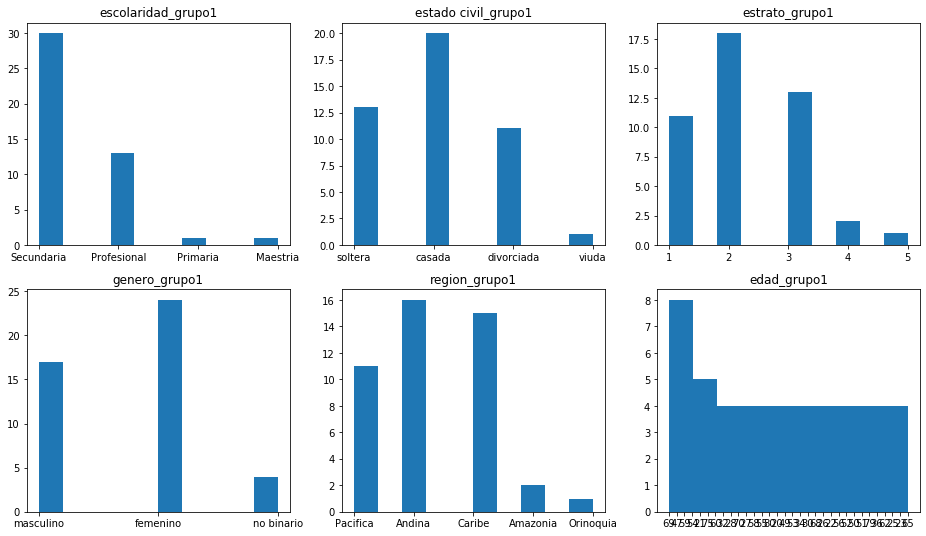

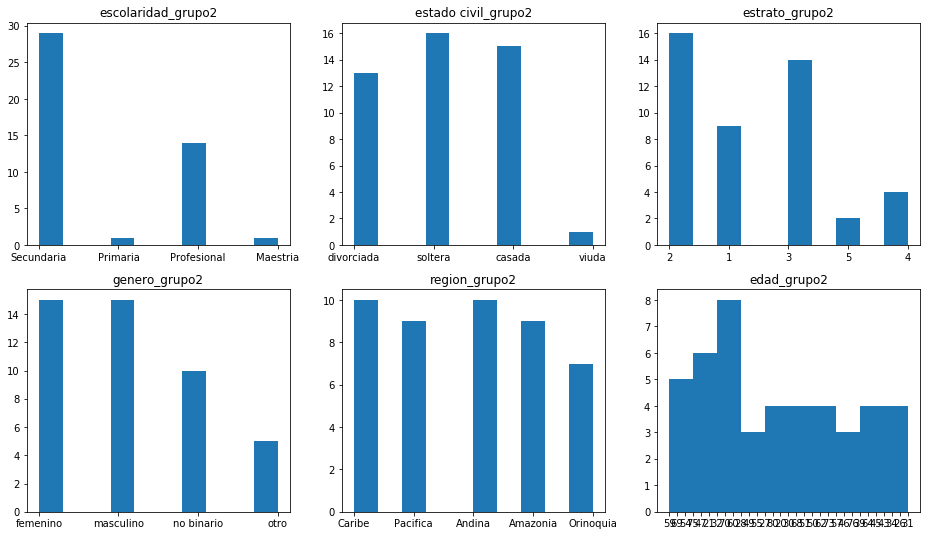

In [134]:
# código
print("Poblacion Grupo 1")
caracteristicas_poblacion(becados_grupo_1, {"escolaridad_grupo1":2, "estado civil_grupo1":3, "estrato_grupo1":4, "genero_grupo1":5, "region_grupo1":7, "edad_grupo1":1},\
                         {"edad_grupo1":1, "estrato_grupo1":4, "pomedio_grupo1":6})

print("Poblacion Grupo 2")
caracteristicas_poblacion(becados_grupo_2, {"escolaridad_grupo2":2, "estado civil_grupo2":3, "estrato_grupo2":4, "genero_grupo2":5, "region_grupo2":7, "edad_grupo2":1},\
                         {"edad_grupo2":1, "estrato_grupo2":4, "pomedio_grupo2":6})

## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

Cantidad de becas Otorgadas = 45 , Cantidad de becas disponibles =  0
[163, '47', 'Secundaria', 'casada', '1', 'masculino', '4.9', 'Andina']
[208, '21', 'Profesional', 'casada', '2', 'femenino', '4.9', 'Andina']
[364, '32', 'Secundaria', 'casada', '1', 'femenino', '4.9', 'Pacifica']
[472, '21', 'Secundaria', 'soltera', '3', 'masculino', '4.9', 'Pacifica']
[284, '28', 'Secundaria', 'divorciada', '1', 'no binario', '4.8', 'Andina']
[386, '49', 'Secundaria', 'soltera', '1', 'masculino', '4.7', 'Pacifica']
[479, '27', 'Secundaria', 'casada', '2', 'femenino', '4.6', 'Amazonia']
[50, '20', 'Secundaria', 'soltera', '3', 'masculino', '4.5', 'Amazonia']
[162, '26', 'Secundaria', 'casada', '3', 'masculino', '4.4', 'Pacifica']
[223, '34', 'Profesional', 'soltera', '2', 'masculino', '4.4', 'Andina']
[309, '30', 'Secundaria', 'divorciada', '2', 'femenino', '4.4', 'Caribe']
[288, '20', 'Secundaria', 'soltera', '1', 'femenino', '4.3', 'Pacifica']
[135, '22', 'Secundaria', 'soltera', '3', 'femenino', 

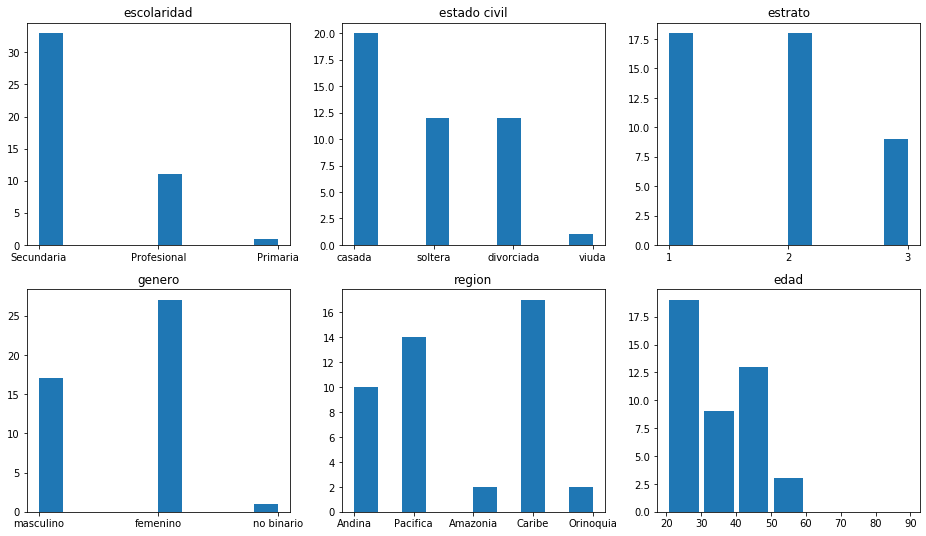

In [167]:
# código

# código
#Función que retorna la población que será becada por el nuevo criterio, así como sus características
#Recibe como parámetro la cantida de becas, una lista de listas que contiene la informaciónd de los aspirantes, el valor
#maximo u minimo de edad, el criterio que puede ser "genero", "edad", "estrato" y un diccionario con el porcentaje de becas
#El porcentaje de becas debe ser un diccionario como el siguiente {"masculino":0.4, "femenino":0.6, "no binario": 0.0, "otro":0.0}
# {"categoria":porcentaje, ...}

#Para la función se asumen que los archivos se leyeron en el orden de la misión 1, pos_estrato = 4, pos_promedio = 6, 
#pos_genero = 5, pos_region = 7, pos_edad = 1

def seleccionador_becados(cantidad_becas, aspirantes, valor_max_edad, valor_min_edad, criterio, porcentaje_becas):
    porcentaje_becas_keys = list(porcentaje_becas.keys())
    porcentaje_becas_values = list(porcentaje_becas.values())
    becas_otorgadas = 0
    becados = []
    lista_becas_otorgadas = [0 for i in list(range(len(porcentaje_becas_keys)))]
    
    if(criterio == "genero"):
        data_criterio = 5
    elif(criterio == "estrato"):
        data_criterio = 4 
    elif(criterio == "region"):
        data_criterio = 7
    else:
        print ("el criterio seleccionado no es ni genero, ni estrato, ni región")
        
    aspirantes_ordenado = sorted(aspirantes, reverse = True, key=lambda x: x[6])
    aspirantes_ordenad_edad = [x for x in aspirantes_ordenado if int(x[1])>=valor_min_edad and int(x[1])<=valor_max_edad]
    
    if(sum (porcentaje_becas_values)<=1 and becas_otorgadas <= cantidad_becas):
        for i in aspirantes_ordenad_edad:
            for j in range(len(porcentaje_becas_keys)):
                if i[data_criterio] == porcentaje_becas_keys[j]\
                and lista_becas_otorgadas[j] < mt.floor(cantidad_becas*(porcentaje_becas.get(porcentaje_becas_keys[j]))):
                    becados.append(i)
                    lista_becas_otorgadas[j] += 1
                    becas_otorgadas += 1
                else:
                    becados
        print("Cantidad de becas Otorgadas =", becas_otorgadas, ", Cantidad de becas disponibles = ", cantidad_becas-becas_otorgadas)
        
        if(cantidad_becas - becas_otorgadas != 0 ):
            print ("Las", cantidad_becas - becas_otorgadas, " becas restantes corresponden a becas que según el criterio no se pudieron asignar" )
        
        for i in becados:
            print(i)
    else:
        print("Se esta intentando asignar una cantidad de becas mayor a la disponible, por favor revice los porcentajes")
        
    return caracteristicas_poblacion(becados, {"escolaridad":2, "estado civil":3, "estrato":4, "genero":5, "region":7, "edad":1},\
                         {"edad":1, "pomedio":6}) 

#seleccionador_becados(45, data_aspirantes, 50, 18, "genero" , {"masculino":0.4, "femenino":0.6, "no binario": 0.0, "otro":0.0}) 
seleccionador_becados(45, data_aspirantes, 50, 18, "estrato" , {"1":0.4, "2":0.4, "3": 0.2, "4":0.0, "5":0.0}) 
#seleccionador_becados(45, data_aspirantes, 50, 18, "region" , {"Andina":0.4, "Pacifica":0.3, "Orinoquia": 0.1, "Caribe":0.1, "Amazonia":0.1}) 


**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [ ]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = ''

**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [ ]:
# código

conclusion = ''

## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21